In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

In [3]:
def fit_kmeans(data, k):
    """
    Fits KMeans clustering on the given data.
    Returns the fitted model and cluster labels.
    """
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)

    cluster_counts = Counter(labels)
    
    return kmeans, labels, cluster_counts

In [4]:
def plot_clusters(data, labels, kmeans):
    """
    Plots the clustered data with different colors.
    """
    plt.figure(figsize=(8, 6))
    
    # Scatter plot with cluster colors
    plt.scatter(x, y, c=labels, cmap='viridis', alpha=0.7, edgecolors='black')

    # Plot cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', marker='X', edgecolors='black', label='Centroids')

    plt.xlabel("Riders Origin (x)")
    plt.ylabel("Riders Origin (y)")
    plt.title("KMeans Clustering")
    plt.legend()
    plt.grid(True)
    plt.show()


def precompute_decision_boundary(kmeans, resolution=100):
    """
    Precomputes the decision boundary for the given KMeans model
    within a bounded region (0, 20) x (0, 20).
    """
    x_range = np.linspace(0, 20, resolution)
    y_range = np.linspace(0, 20, resolution)
    
    xx, yy = np.meshgrid(x_range, y_range)
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Predict clusters for each point in the grid
    grid_labels = kmeans.predict(grid_points)
    
    return xx, yy, grid_labels.reshape(xx.shape)

def plot_decision_boundary(xx, yy, grid_labels, data, labels, kmeans):
    """
    Plots the precomputed decision boundary along with clustered data.
    """
    plt.figure(figsize=(8, 6))
    
    # Plot the decision boundary
    plt.contourf(xx, yy, grid_labels, alpha=0.3, cmap='viridis')

    # Scatter plot of original data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='black', label="Data Points")
    
    # Plot cluster centers
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=200, c='red', marker='X', edgecolors='black', label='Centroids')

    plt.xlabel("Riders Origin (x)")
    plt.ylabel("Riders Origin (y)")
    plt.title("Precomputed KMeans Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
n = 1000
k = 4
corr = np.random.uniform(0, 20, (n, 2))

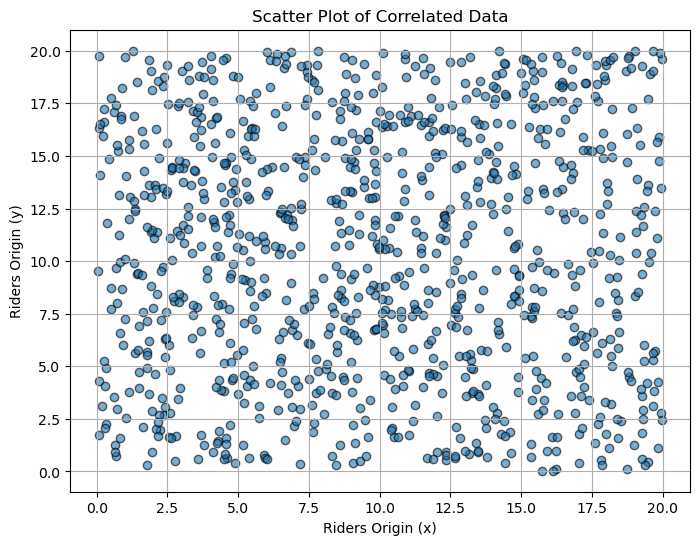

In [6]:
# Extract x and y values
x = corr[:, 0]
y = corr[:, 1]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, edgecolors='black')
plt.xlabel("Riders Origin (x)")
plt.ylabel("Riders Origin (y)")
plt.title("Scatter Plot of Correlated Data")
plt.grid(True)

# Show the plot
plt.show()

Cluster member counts: Counter({2: 276, 0: 258, 3: 237, 1: 229})


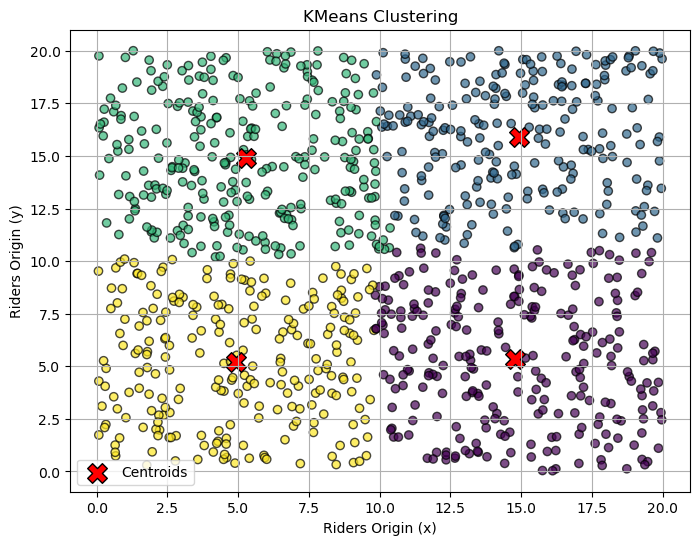

In [7]:
kmeans, labels, cluster_counts = fit_kmeans(corr, k)
print("Cluster member counts:", cluster_counts)
plot_clusters(corr, labels, kmeans)

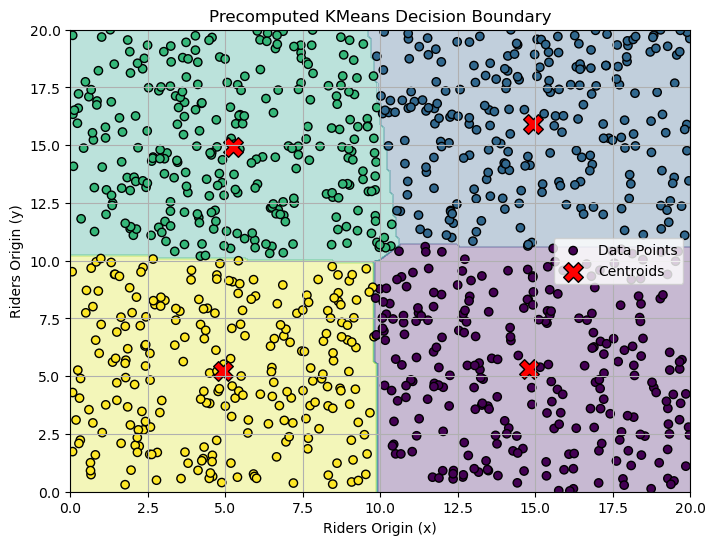

In [8]:
xx, yy, grid_labels = precompute_decision_boundary(kmeans, resolution=200)

# Plot the decision boundary
plot_decision_boundary(xx, yy, grid_labels, corr, labels, kmeans)

#### To quickly finds which cluster is the closest

In [9]:
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]

(array([14.78452898, 14.9235848 ,  5.25952523,  4.92029383]),
 array([ 5.32478237, 15.92027832, 14.91879586,  5.22094245]))

In [10]:
new_labels = kmeans.predict([[1, 2], [20, 20], [1, 20]])
new_labels

array([3, 1, 2], dtype=int32)

we can actually make it cheaper by just check where the corr is in decision boundry but it is barely o(n) so I will not worry about 30ish drivers

#### Let's try with Beta density

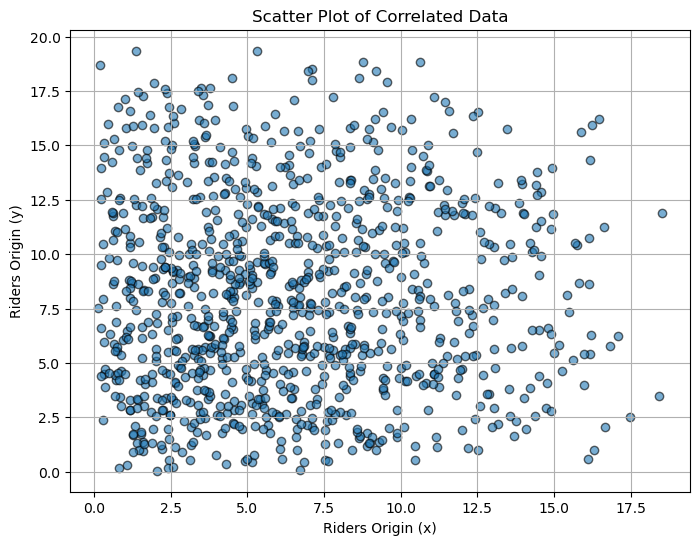

In [11]:
new_corr_x = np.random.beta(1.355, 2.980, (n, 1)) * 20
new_corr_y = np.random.beta(1.590, 2.312, (n, 1)) * 20
plt.figure(figsize=(8, 6))
plt.scatter(new_corr_x, new_corr_y, alpha=0.6, edgecolors='black')
plt.xlabel("Riders Origin (x)")
plt.ylabel("Riders Origin (y)")
plt.title("Scatter Plot of Correlated Data")
plt.grid(True)

# Show the plot
new_corr = np.column_stack((new_corr_x, new_corr_y))

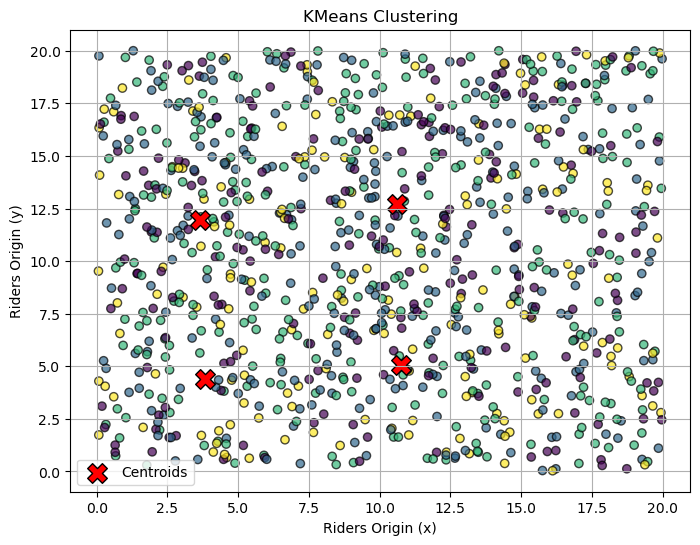

In [12]:
kmeans, labels, cluster_counts = fit_kmeans(new_corr, k)
plot_clusters(new_corr, labels, kmeans)

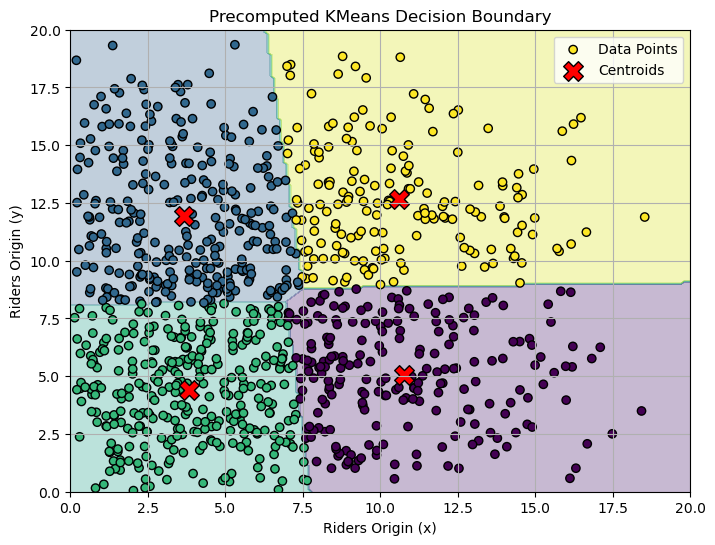

In [13]:
xx, yy, grid_labels = precompute_decision_boundary(kmeans, resolution=200)

# Plot the decision boundary
plot_decision_boundary(xx, yy, grid_labels, new_corr, labels, kmeans)

In [14]:
kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1]

(array([10.76273264,  3.6653219 ,  3.82932493, 10.61392666]),
 array([ 5.04707694, 11.94594457,  4.38637986, 12.69211455]))

In [15]:
print("Cluster member counts:", cluster_counts)

Cluster member counts: Counter({2: 326, 1: 285, 0: 216, 3: 173})


#### Uniform

In [57]:
def monte_carlo_distance_pre_generated_uni(num_trials, grid_width, grid_height, distance_func):
    # Pre-generate random points for two grids
    points1 = np.random.uniform(0, grid_width, (num_trials, 2))
    points2 = np.random.uniform(0, grid_height, (num_trials, 2))
    # Compute distances using the provided function
    distances = distance_func(points1, points2)
    return distances

def euclidean_distance(points1, points2):
    # Calculate Euclidean distance for each pair of points
    return np.linalg.norm(points1 - points2, axis=1)

# Parameters
num_trials = 10000
grid_width = 20
grid_height = 20

# Run simulation
distances = monte_carlo_distance_pre_generated_uni(num_trials, grid_width, grid_height, euclidean_distance)
avg_distance = np.mean(distances)
std_error = np.std(distances, ddof=1) / np.sqrt(num_trials)

print("Average Euclidean distance:", avg_distance)
print("Standard error of the average distance:", std_error)


Average Euclidean distance: 10.438427798988606
Standard error of the average distance: 0.04965937401752259


In [58]:
def monte_carlo_distance_pre_generated(num_trials, grid_width, grid_height, distance_func):
    # Pre-generate random points for two grids
    points1_x = np.random.beta(1.355, 2.980, (num_trials, 1)) * 20
    points1_y = np.random.beta(1.590, 2.312, (num_trials, 1)) * 20
    points2_x = np.random.beta(1.596, 1.817, (num_trials, 1)) * 20
    points2_y = np.random.beta(2.076, 1.575, (num_trials, 1)) * 20
    point1 = np.column_stack((points1_x, points1_y))
    point2 = np.column_stack((points2_x, points2_y))
    # Compute distances using the provided function
    distances = distance_func(point1, point2)
    return distances

def euclidean_distance(points1, points2):
    # Calculate Euclidean distance for each pair of points
    return np.linalg.norm(points1 - points2, axis=1)

# Parameters
num_trials = 10000
grid_width = 20
grid_height = 20

# Run simulation
distances = monte_carlo_distance_pre_generated(num_trials, grid_width, grid_height, euclidean_distance)
avg_distance = np.mean(distances)
# Standard error: using ddof=1 for an unbiased estimator
std_error = np.std(distances, ddof=1) / np.sqrt(num_trials)

print("Average Euclidean distance:", avg_distance)
print("Standard error of the average distance:", std_error)


Average Euclidean distance: 8.95607346121993
Standard error of the average distance: 0.043493286447921865


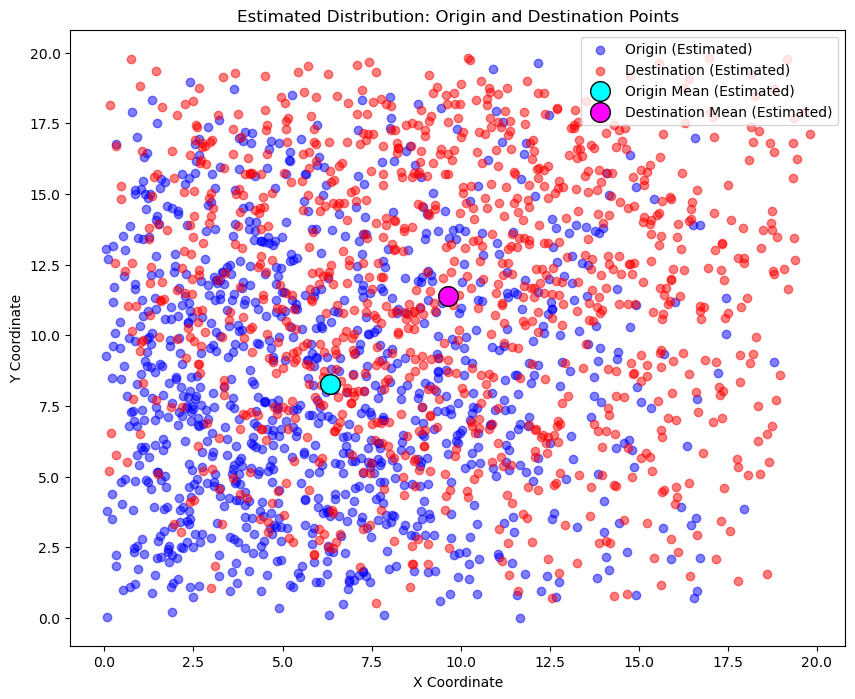

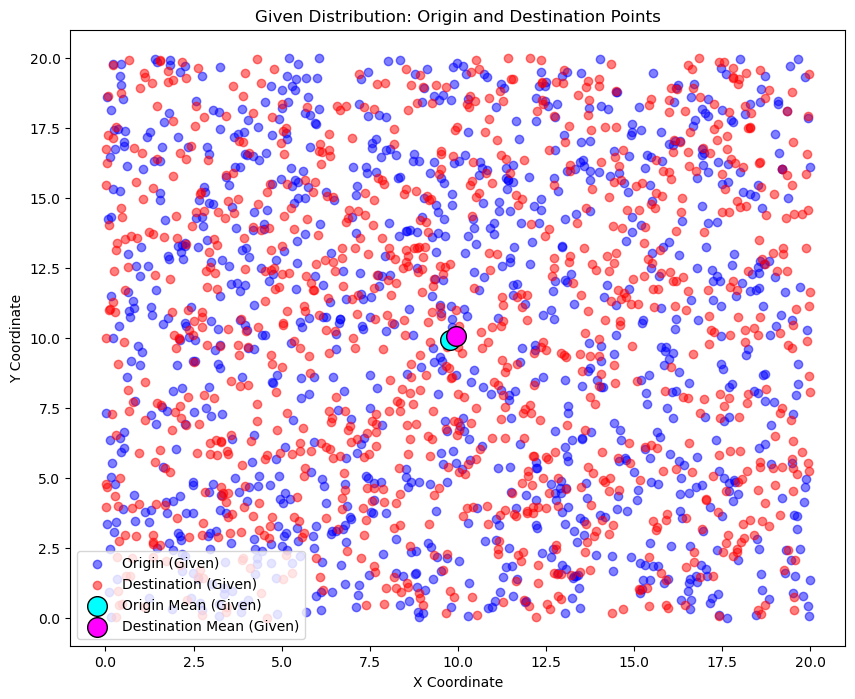

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
n = 1000
num_trials = 1000

# ---- Beta Distribution Example ----
# Generate origin points using beta distributions
origins_x = np.random.beta(1.355, 2.980, (n, 1)) * 20
origins_y = np.random.beta(1.590, 2.312, (n, 1)) * 20

# Generate destination points using beta distributions
dest_x = np.random.beta(1.596, 1.817, (num_trials, 1)) * 20
dest_y = np.random.beta(2.076, 1.575, (num_trials, 1)) * 20

# Compute the means
origin_mean_x = np.mean(origins_x)
origin_mean_y = np.mean(origins_y)
dest_mean_x   = np.mean(dest_x)
dest_mean_y   = np.mean(dest_y)

# Create scatter plot for beta distributions
plt.figure(figsize=(10, 8))
plt.scatter(origins_x, origins_y, color='blue', label='Origin (Estimated)', alpha=0.5)
plt.scatter(dest_x, dest_y, color='red', label='Destination (Estimated)', alpha=0.5)

# Mark the means
plt.scatter(origin_mean_x, origin_mean_y, color='cyan', edgecolor='black', 
            marker='o', s=200, label='Origin Mean (Estimated)')
plt.scatter(dest_mean_x, dest_mean_y, color='magenta', edgecolor='black', 
            marker='o', s=200, label='Destination Mean (Estimated)')

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Estimated Distribution: Origin and Destination Points")
plt.legend()
plt.show()


# ---- Uniform Distribution Example ----
# Generate origin points uniformly
origins_x_uniform = np.random.uniform(0, 20, (n, 1))
origins_y_uniform = np.random.uniform(0, 20, (n, 1))

# Generate destination points uniformly
dest_x_uniform = np.random.uniform(0, 20, (num_trials, 1))
dest_y_uniform = np.random.uniform(0, 20, (num_trials, 1))

# Compute the means for uniform distributions
origin_mean_x_uniform = np.mean(origins_x_uniform)
origin_mean_y_uniform = np.mean(origins_y_uniform)
dest_mean_x_uniform   = np.mean(dest_x_uniform)
dest_mean_y_uniform   = np.mean(dest_y_uniform)

# Create scatter plot for uniform distributions
plt.figure(figsize=(10, 8))
plt.scatter(origins_x_uniform, origins_y_uniform, color='blue', label='Origin (Given)', alpha=0.5)
plt.scatter(dest_x_uniform, dest_y_uniform, color='red', label='Destination (Given)', alpha=0.5)

# Mark the means
plt.scatter(origin_mean_x_uniform, origin_mean_y_uniform, color='cyan', edgecolor='black', 
            marker='o', s=200, label='Origin Mean (Given)')
plt.scatter(dest_mean_x_uniform, dest_mean_y_uniform, color='magenta', edgecolor='black', 
            marker='o', s=200, label='Destination Mean (Given)')

plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Given Distribution: Origin and Destination Points")
plt.legend()
plt.show()

plt.show()